In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('dataset 1.csv')

In [3]:
df.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1339 non-null   object 
 1   age             1339 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1339 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB


In [5]:
df=pd.get_dummies(df,columns=['sex'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1339 non-null   object 
 1   age             1339 non-null   int64  
 2   bmi             1338 non-null   float64
 3   charges in INR  1339 non-null   float64
 4   sex_female      1339 non-null   uint8  
 5   sex_male        1339 non-null   uint8  
dtypes: float64(2), int64(1), object(1), uint8(2)
memory usage: 44.6+ KB


In [6]:
df.describe()

,age,bmi,charges in INR,sex_female,sex_male
count,1339.000000,1338.000000,1339.000000,1339.000000,1339.000000
mean,39.204630,30.663397,13284.666580,0.494399,0.504854
std,14.044982,6.098187,12116.701295,0.500155,0.500163
min,18.000000,15.960000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,4742.306100,0.000000,0.000000
50%,39.000000,30.400000,9386.161300,0.000000,1.000000
75%,51.000000,34.693750,16717.010750,1.000000,1.000000
max,64.000000,53.130000,63770.428010,1.000000,1.000000


In [7]:
df.dropna(inplace=True)

In [8]:
df.skew()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_644\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age               0.055673
bmi               0.284047
charges in INR    1.515880
sex_female        0.020951
sex_male         -0.020951
dtype: float64

In [9]:
df.kurt()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_644\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


age              -1.245088
bmi              -0.050732
charges in INR    1.606299
sex_female       -2.002557
sex_male         -2.002557
dtype: float64

<AxesSubplot:>

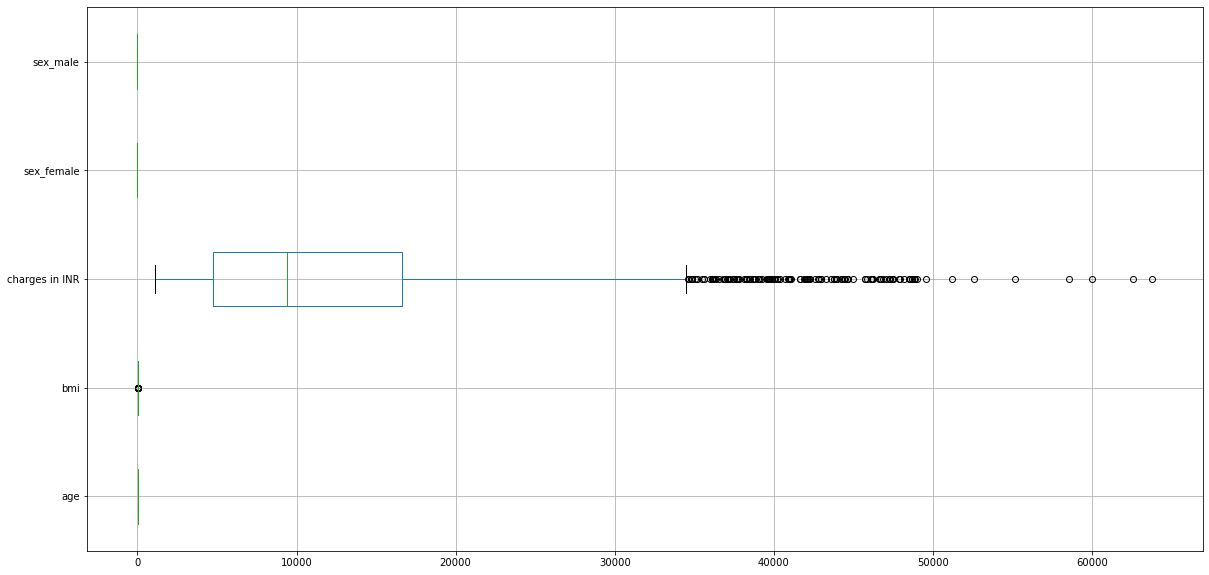

In [10]:
plt.figure(figsize=(20,10))
df.boxplot(vert=False)

In [11]:
X=df.drop(['Policy no.','charges in INR'],axis=1)
X.head()

,age,bmi,sex_female,sex_male
0,19,27.900,1,0
1,18,33.770,0,1
2,28,33.000,0,1
3,33,22.705,0,1
4,32,28.880,0,1


In [12]:
y=df['charges in INR']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
model=DecisionTreeRegressor()

In [15]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
y_pred=model.predict(X_test)

In [17]:
r2_score(y_test,y_pred)

-0.8481482637375102